In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import F5Utils

In [10]:
file = "../somedata/umi10000bins/batch0.fast5"
n = next(F5Utils.getReads(file))
read = [str(n[0]),n[1]] # unwrap tuple
read[1] = read[1][550:]

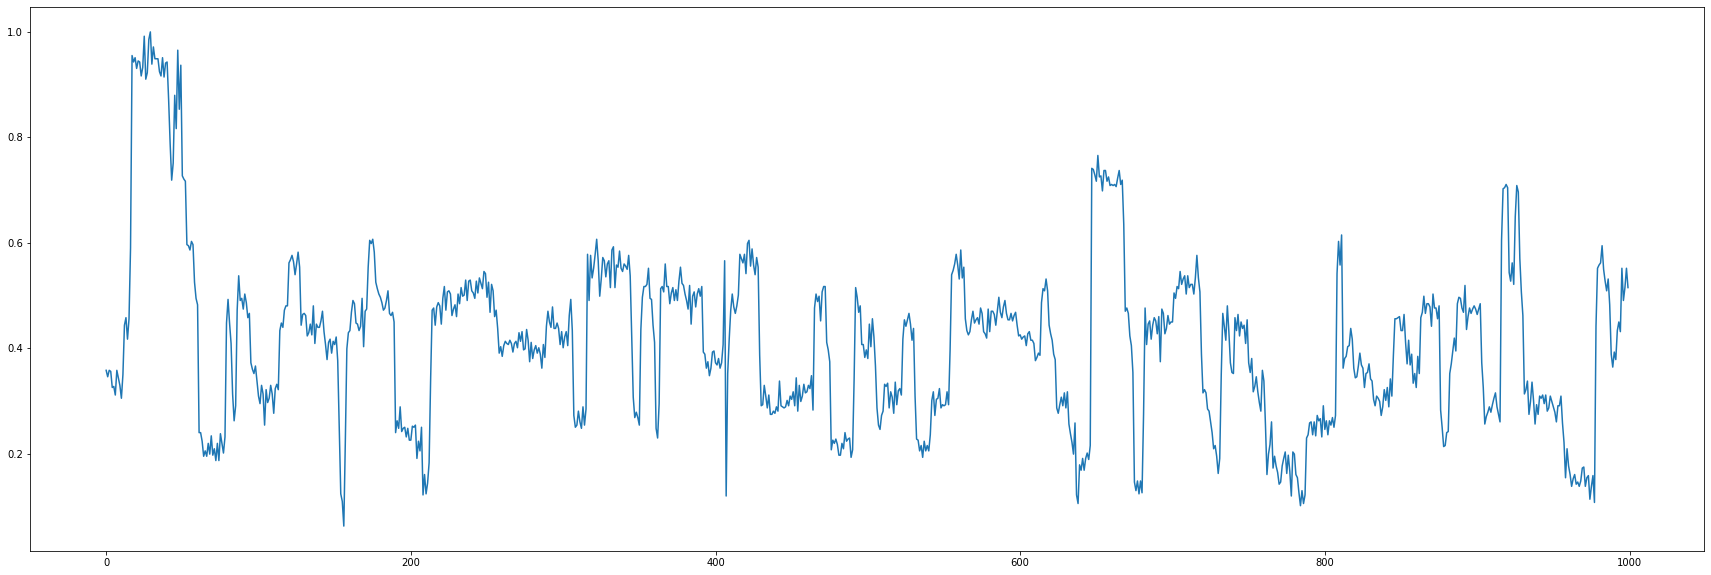

In [19]:
plt.figure(figsize=(30,10))
read[1] = (read[1] - min(read[1]))/max(read[1]) # normalising
plt.plot(read[1][:1000])

In [12]:
DNAdata = read[0].split("\\n")[1]
print(len(DNAdata))
len(DNAdata.split('AAAAAA')[0])

4306


2675

In [28]:
mapper = {
    "T": 0,
    "C": 0.1,
    "A": 0.2,
    "G": 0.3
}

mD = list(map(lambda x: mapper[x], DNAdata))
print(mD[:5])
ratio = len(read[1])/len(mD)

rr = []
for i in range(len(mD)):
    rr.extend([mD[i] for j in range(round(((i+1)*ratio)-len(rr)))])
print(rr[:20])

[0.1, 0.3, 0.2, 0, 0.3]
[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3]


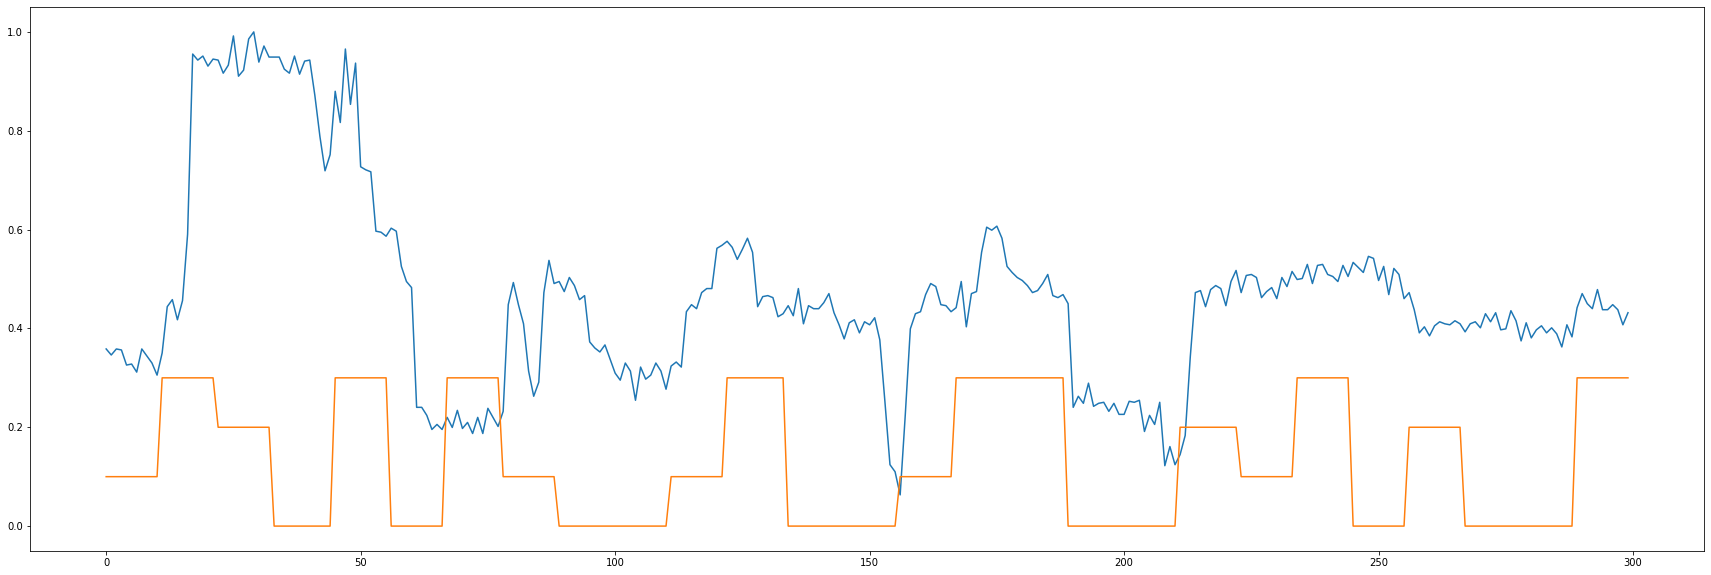

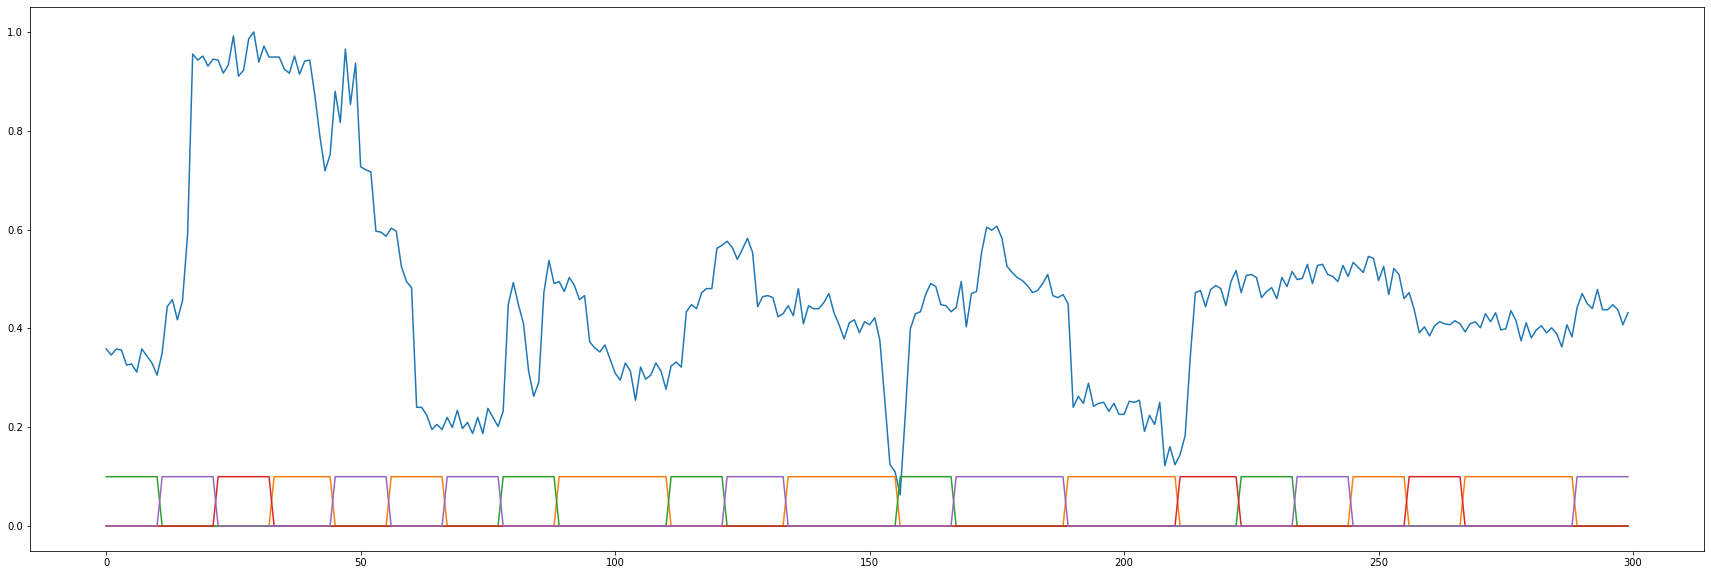

In [37]:
def plotFromTo(i, j):
    plt.figure(figsize=(30,10))
    plt.plot(read[1][i:j])
    plt.plot(rr[i:j])
    
def plotFromToOneHot(i, j):
    plt.figure(figsize=(30,10))
    plt.plot(read[1][i:j])
    plt.plot(list(map(lambda x: 0.1 if x == 0 else 0, rr[i:j])))
    plt.plot(list(map(lambda x: 0.1 if x == 0.1 else 0, rr[i:j])))
    plt.plot(list(map(lambda x: 0.1 if x == 0.2 else 0, rr[i:j])))
    plt.plot(list(map(lambda x: 0.1 if x == 0.3 else 0, rr[i:j])))

plotFromTo(0, 300)
plotFromToOneHot(0, 300)